In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
def plotGraph(pdf, pscaled_df):
    fig, (a, b) = plt.subplots(ncols=2, figsize=(15, 5))

    ax1.set_title("Avant mise à l'echelle")
    for col in pdf.columns:
        sns.kdeplot(pdf[col], ax=a)

    ax2.set_title("Apres mise à l'echelle")
    for col in pdf.columns:
        sns.kdeplot(pscaled_df[col], ax=b)
    
    plt.show()

In [63]:
np.random.seed(1)
df = pd.DataFrame({
    'A': np.random.normal(0, 2, 10000),
    'B': np.random.normal(5, 3, 10000),
    'C': np.random.normal(-5, 5, 10000),  
    'D': np.random.chisquare(8, 10000),
    'E': np.random.beta(8, 2, 10000) * 40,
    'F': np.random.normal(5, 3, 10000)
})
df.head(5)

,A,B,C,D,E,F
0,3.248691,4.632578,-14.657819,8.913396,34.631752,5.091832
1,-1.223513,5.684509,-5.802131,5.583017,33.548787,1.858192
2,-1.056344,3.943085,-9.161098,19.713205,33.386606,7.002279
3,-2.145937,2.508340,-6.030558,23.293714,30.952783,4.142469
4,1.730815,4.216731,0.131275,11.508381,26.925953,4.497778


## Utilisation de StandardScaler

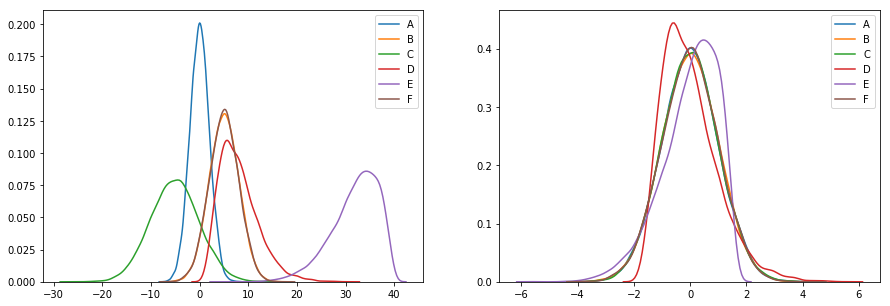

In [64]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['A', 'B', 'C', 'D', 'E', 'F'])

plotGraph(df, scaled_df)

## Utilisation de MinMaxScaler

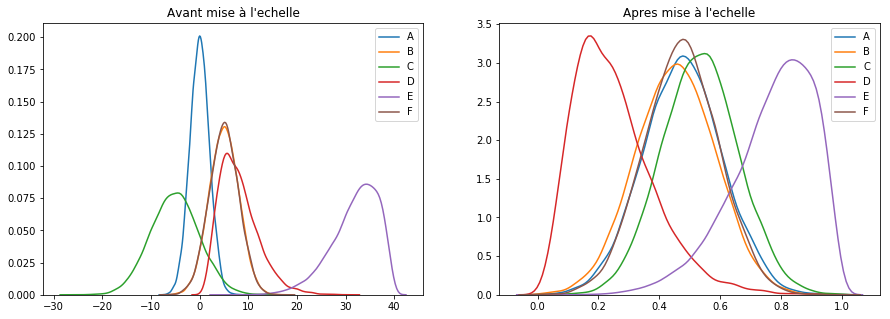

In [59]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['A', 'B', 'C', 'D', 'E', 'F'])

plotGraph(df, scaled_df)

## Utilisation de RobustScaler

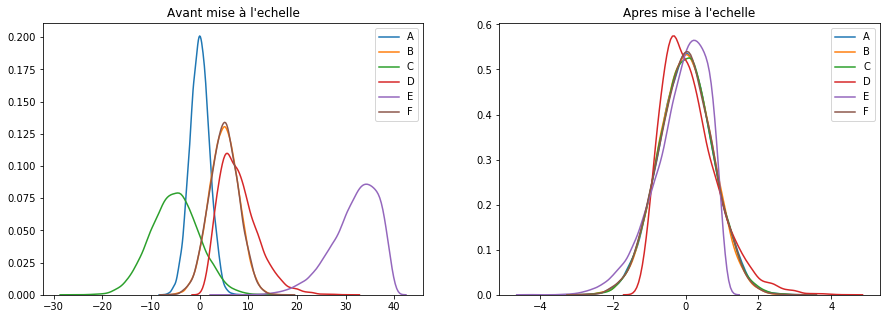

In [60]:
scaler = RobustScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['A', 'B', 'C', 'D', 'E', 'F'])

plotGraph(df, scaled_df)